TODO:
    - perform same computations using sklearn

### Import libraries

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt     # matplotlib.pyplot plots data
import numpy as np                  # numpy provides N-dim object support
from scipy.optimize import fmin_bfgs

# do ploting inline instead of in a separate window
%matplotlib inline

In [2]:
%reload_ext version_information
%version_information numpy, scipy, matplotlib, scipy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.1
matplotlib 1.5.3
scipy 0.18.1
Thu Feb 09 10:01:15 2017 EET

### Load data

In [3]:
data = pd.read_csv("./data/water_flowing(flow_level).csv", names=['water_flow', 'water_level'], header=None)
data['_bias'] = 1

In [4]:
data.shape

(54, 3)

In [5]:
data.head(5)

,water_flow,water_level,_bias
0,-15.9368,2.1343,1
1,-29.1530,1.1733,1
2,36.1895,34.3591,1
3,37.4922,36.8380,1
4,-48.0588,2.8090,1


In [6]:
data.tail(5)

,water_flow,water_level,_bias
49,-23.6696,2.47735,1
50,-9.0118,6.56606,1
51,-55.9406,6.03809,1
52,-35.7086,4.69274,1
53,9.5102,10.83005,1


In [7]:
features = data[['_bias', 'water_flow']]
X = features[0:12]
X_val = features[12:33]
X_test = features[33:54]
result = data[['water_level']]
y = result[0:12]
y_val = result[12:33]
y_test = result[33:54]

### Plot training data

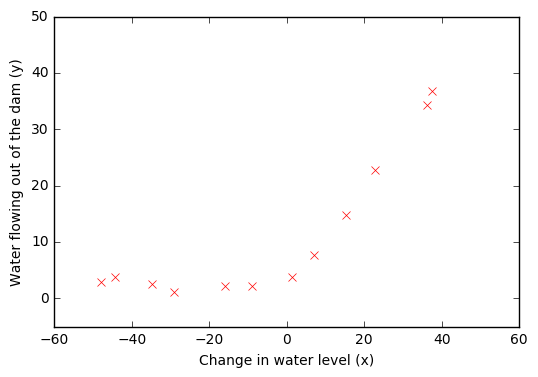

In [8]:
plt.figure()
plt.xlim([-60, 60])
plt.ylim([-5, 50])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X['water_flow'].values, y['water_level'].values, 'rx')
plt.show()

In [9]:
def costFunction(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    J = np.sum((np.dot(X, theta) - y) ** 2) / (2 * m) + np.sum(theta[1:, 0] ** 2) * reg_alpha / (2 * m)
    return float(J)

def computeGradients(theta, X, y, reg_alpha):
    theta = np.array([theta]).T
    m = X.shape[0]
    grad = np.zeros(theta.shape)
    grad = np.dot(X.T,  (np.dot(X, theta) - y)) / m
    temp = theta
    temp[0, 0] = 0
    grad = grad + reg_alpha * temp / m
    return grad.flatten()

def trainLinearReg(X, y, reg_alpha):
    initial_theta = np.zeros((X.shape[1], 1)).flatten()
    opt_theta = fmin_bfgs(costFunction, fprime=computeGradients, x0=initial_theta, args=(X, y, reg_alpha), maxiter=50)
    return opt_theta

In [10]:
opt_theta = trainLinearReg(X, y, 0)
print(opt_theta)

Optimization terminated successfully.
         Current function value: 22.373896
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
[ 13.08792731   0.36777906]


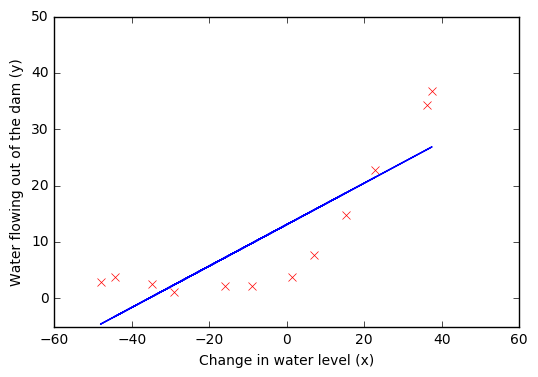

In [11]:
plt.figure()
plt.xlim([-60, 60])
plt.ylim([-5, 50])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X['water_flow'].values, y['water_level'].values, 'rx')
plt.plot(X[['water_flow']].values, np.dot(X, opt_theta), '-')
plt.show()

### Learning curves

In [12]:
def learningCurve(X, y, X_val, y_val, reg_alpha):
    m, n = X.shape
    error_train = [0] * m 
    error_val = [0] * m
    for i in range(0, m):
        theta = trainLinearReg(X[0:i], y[0:i], reg_alpha)
        error_train[i] = costFunction(theta, X[0:i], y[0:i], 0)
        error_val[i] = costFunction(theta, X_val, y_val, 0)
        
    return error_train, error_val

In [13]:
err_train, err_val = learningCurve(X, y, X_val, y_val, 0)

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 3.286635
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated successfully.
         Current function value: 2.842715
         Iterations: 5
         Function evaluations: 6
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 13.154060
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5
Optimization terminated succ

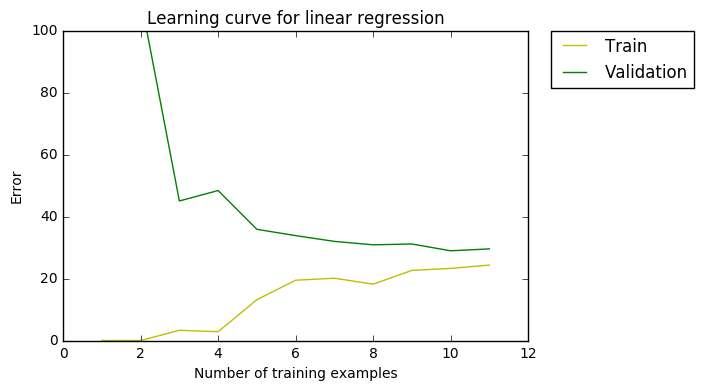

In [14]:
plt.figure()
plt.title('Learning curve for linear regression')
plt.ylim([0, 100])
plt.ylabel('Error')
plt.xlabel('Number of training examples')
plt.plot(np.arange(len(err_train)), err_train, 'y-', label='Train')
plt.plot(np.arange(len(err_val)), err_val, 'g-', label='Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Polynomial regression

In [15]:
def polyFeatures(X, p):
    X_poly = np.zeros((X.shape[0], p))
    for i in range(0, p):
        X_poly[:, i] = X ** (i + 1)
    return X_poly

In [16]:
def featureNormalize(X):
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [17]:
X_poly8 = polyFeatures(X['water_flow'], 8)
X_poly8_norm, mu_train, sigma_train = featureNormalize(X_poly8)
X_poly8_norm = np.concatenate((np.ones((X_poly8_norm.shape[0], 1)), X_poly8_norm), axis=1)

X_val_poly8 = polyFeatures(X_val['water_flow'], 8)
X_val_poly8_norm = (X_val_poly8 - mu_train) / sigma_train
X_val_poly8_norm = np.concatenate((np.ones((X_val_poly8_norm.shape[0], 1)), X_val_poly8_norm), axis=1)

X_test_poly8 = polyFeatures(X_test['water_flow'], 8)
X_test_poly8_norm = (X_test_poly8 - mu_train) / sigma_train
X_test_poly8_norm = np.concatenate((np.ones((X_test_poly8_norm.shape[0], 1)), X_test_poly8_norm), axis=1)

         Current function value: 0.103830
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51


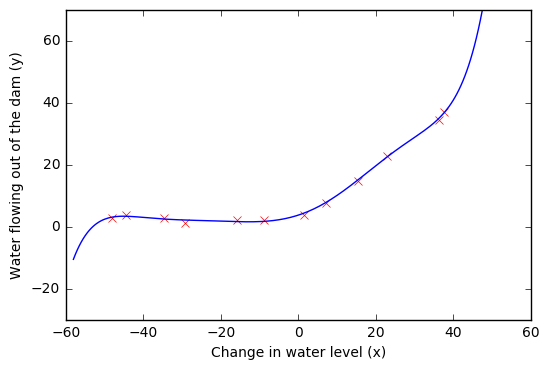

In [18]:
opt_poly_theta = trainLinearReg(X_poly8_norm, y, 0)
plt.figure()
plt.xlim([-60, 60])
plt.ylim([-30, 70])
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.plot(X['water_flow'].values, y['water_level'].values, 'rx')

fit_range = np.arange(np.min(X['water_flow'].values) - 10, np.max(X['water_flow'].values) + 10, 0.5)
fit_range_poly8_norm = (polyFeatures(fit_range, 8) - mu_train) / sigma_train
fit_range_poly8_norm = np.concatenate((np.ones((fit_range_poly8_norm.shape[0], 1)), fit_range_poly8_norm), axis=1)
plt.plot(fit_range.flatten(), np.dot(fit_range_poly8_norm, opt_poly_theta), '-')

plt.show()

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 23
         Function evaluations: 24
         Gradient evaluations: 24
Optimization terminated

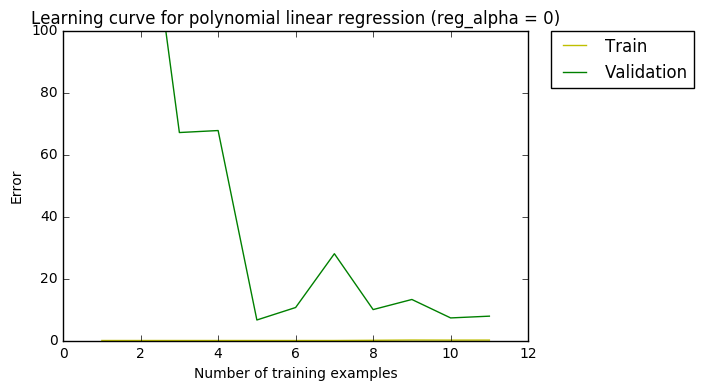

In [19]:
err_train, err_val = learningCurve(X_poly8_norm, y, X_val_poly8_norm, y_val, 0)

plt.figure()
plt.title(('Learning curve for polynomial linear regression (reg_alpha = {})').format(0))
plt.ylim([0, 100])
plt.ylabel('Error')
plt.xlabel('Number of training examples')
plt.plot(np.arange(len(err_train)), err_train, 'y-', label='Train')
plt.plot(np.arange(len(err_val)), err_val, 'g-', label='Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Validation for selecting best lambda

In [47]:
def validationCurve(X, y, X_val, y_val):
    lmbda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
    error_train = [0] * len(lmbda_vec)
    error_val = [0] * len(lmbda_vec)

    for i in range(0, len(lmbda_vec)):
        lmbda = lmbda_vec[i]
        theta = trainLinearReg(X, y, lmbda)
        error_train[i] = costFunction(theta, X, y, 0)
        error_val[i] = costFunction(theta, X_val, y_val, 0)
        
    return lmbda_vec, error_train, error_val

In [48]:
lmbda_vec, error_train, error_val = validationCurve(X_poly8_norm, y, X_val_poly8_norm, y_val)

print('Lambda     Train Error    Validation Error')
for i in range(len(lmbda_vec)):
    print('{:.4f}    {:.4f}    {:.4f}'.format(lmbda_vec[i], error_train[i], error_val[i]))

         Current function value: 0.103830
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.171144
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.243184
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 0.371281
         Iterations: 49
         Function evaluations: 50
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 0.636700
         Iterations: 46
         Function evaluations: 47
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 1.360568
         Iterations: 39
         Function evaluations: 40
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 2.917644
  

In [ ]:
plt.figure()
plt.ylim([0, 20])
plt.ylabel('Error')
plt.xlabel('Lambda')
plt.plot(lmbda_vec, error_train, 'y-', label='Train')
plt.plot(lmbda_vec, error_val, 'g-', label='Validation')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Best lambda: 3

In [53]:
opt_theta = trainLinearReg(X_poly8_norm, y, 3)
error_test = costFunction(opt_theta, X_poly8_norm, y, 0)
print('Best theta:')
print(opt_theta)

print('\nFinal model test error: {:.4f}'.format(error_test))

Optimization terminated successfully.
         Current function value: 14.937642
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Best theta:
[ 11.21760842   6.5220858    3.82487288   3.61985586   2.18396111
   2.10604649   1.28077895   1.28789837   0.72492992]

Final model test error: 4.5251
